In [1]:
%matplotlib inline

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import glob

import datetime
year = datetime.date.today().year
month = datetime.date.today().month
import os
results_dir = '../Results/{}_{:02}/Read_lengths'.format(year, month)
if not os.path.exists(results_dir):
    os.makedirs(results_dir)

In [3]:
import matplotlib
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['axes.titlesize'] = 14

matplotlib.rcParams['axes.grid'] = True
matplotlib.rcParams['grid.color'] = '0.5'
matplotlib.rcParams['grid.linewidth'] = '0.5'

matplotlib.rcParams['axes.edgecolor'] = '0.25'
matplotlib.rcParams['xtick.color'] = '0'
matplotlib.rcParams['ytick.color'] = '0'

matplotlib.rcParams['xtick.major.width'] = 1
matplotlib.rcParams['ytick.major.width'] = 1
matplotlib.rcParams['ytick.major.size'] = 5
matplotlib.rcParams['xtick.major.size'] = 5
matplotlib.rcParams['axes.spines.right'] = True
matplotlib.rcParams['axes.spines.left'] = True
matplotlib.rcParams['axes.spines.top'] = True
matplotlib.rcParams['axes.spines.bottom'] = True

matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = 'Helvetica'
matplotlib.rcParams['font.weight']='normal'
matplotlib.rcParams['axes.axisbelow'] = True

# First the analysis of *mapped* reads where mapping was performed with HISAT2

This count file comes from running the file `READLENGTHS_from_sam.py` which I wrote as a custom script to only consider the read lengths of primary mappings for my set of `.sam` files

In [4]:
rl_df = pd.read_csv('../Data/Read_length_info/read_lengths.tsv', sep='\t', index_col=0)
rl_df.sort_index(inplace=True)

In [5]:
rl_df = rl_df[['WTrep1.ribo.sam', 'WTrep2.ribo.sam', 'RIBOTrep1.ribo.sam', 'RIBOTrep2.ribo.sam',\
             'WTrep1.rna.sam', 'WTrep2.rna.sam', 'RIBOTrep1.rna.sam', 'RIBOTrep2.rna.sam']]

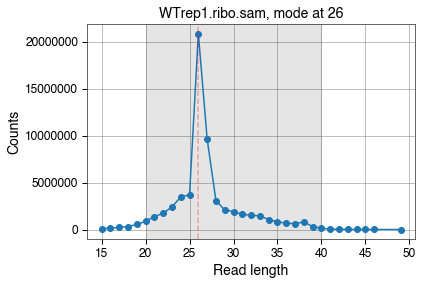

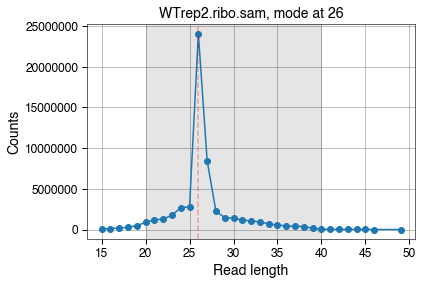

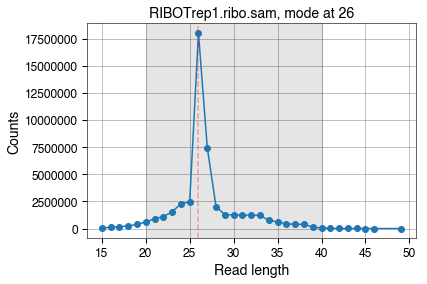

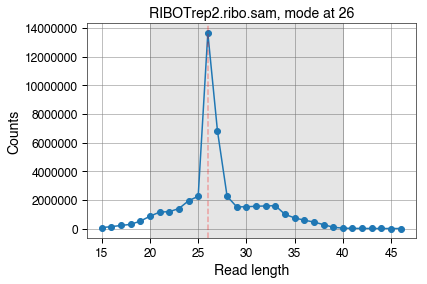

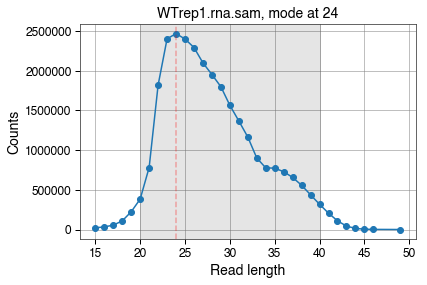

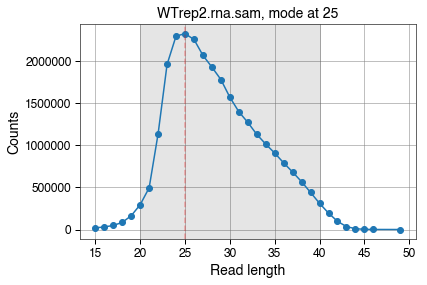

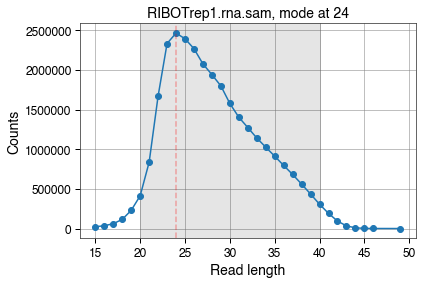

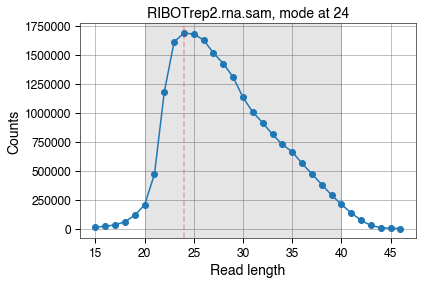

In [6]:
for sample in rl_df.columns:
    a = rl_df.index
    b = list(rl_df[sample])
    zipped = zip(a,b)
    max_index, max_val = max(zipped, key=lambda x: x[1])
    fig, ax = plt.subplots()
    ax.plot(a, b, marker='o')
    ax.set_title('{}, mode at {}'.format(sample, max_index))
    ax.axvline(max_index, c='r', linestyle='--', alpha=0.3)
    ax.axvspan(20, 40, color='k', alpha=0.1)
    ax.set_ylabel('Counts')
    ax.set_xlabel('Read length')
    ax.get_yaxis().get_major_formatter().set_scientific(False)
    plt.tight_layout()
    plt.savefig('{}/{}.mapped.readlengths.pdf'.format(results_dir, sample.replace('.sam', '')), bbox_inches='tight')


In [7]:
rl_df.sum()

WTrep1.ribo.sam       61489731.0
WTrep2.ribo.sam       55078729.0
RIBOTrep1.ribo.sam    46355153.0
RIBOTrep2.ribo.sam    43652701.0
WTrep1.rna.sam        28456731.0
WTrep2.rna.sam        27357146.0
RIBOTrep1.rna.sam     29107713.0
RIBOTrep2.rna.sam     20332739.0
dtype: float64

In [8]:
rl_df.to_csv('{}/mapped_read_length_df.tsv'.format(results_dir), sep='\t')

# Next, my analysis of reads from `.fastq.gz` files

**First, the initial lane files with zero processing**

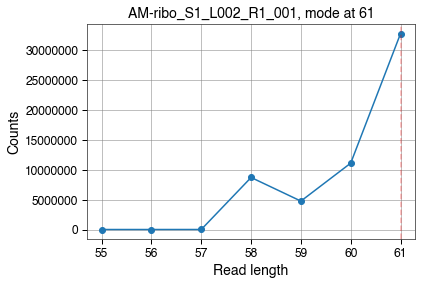

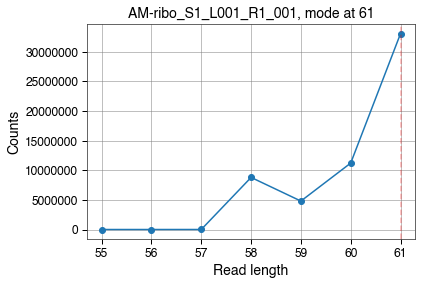

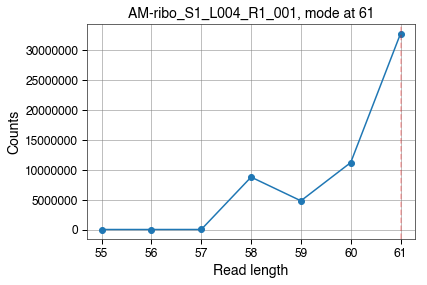

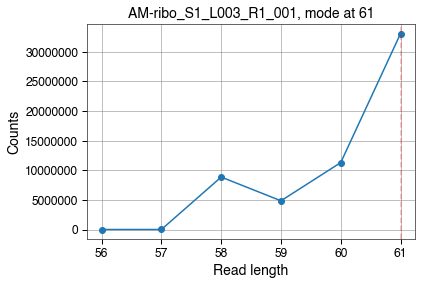

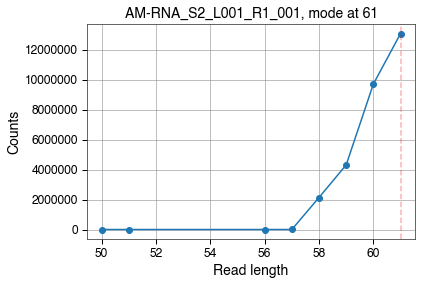

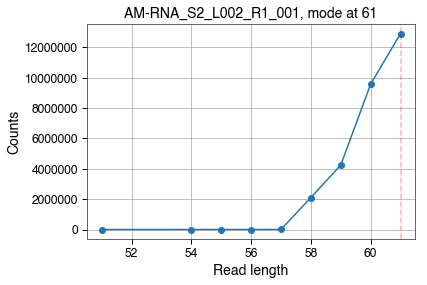

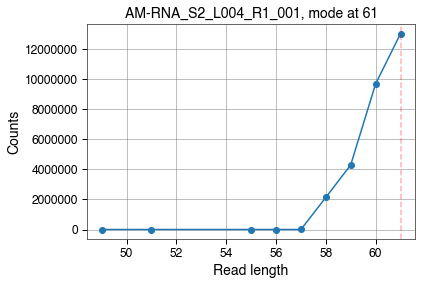

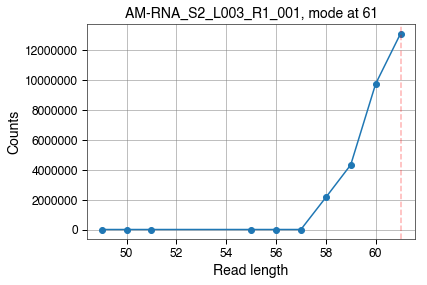

In [9]:
cumulative_df = pd.DataFrame()
for infile_loc in glob.glob('../Data/Read_length_info/AM-*.txt')[:]:
    sample_id = infile_loc.split('/')[-1].split('.')[0]
    df = pd.read_csv(infile_loc, sep=' ', header=None, index_col=0)
    df.sort_index(inplace=True)
    
    a = df.index
    b = df[1]
    
    zipped = zip(a,b)
    max_index, max_val = max(zipped, key=lambda x: x[1])
    fig, ax = plt.subplots()
    ax.plot(a, b, marker='o')
    ax.set_title('{}, mode at {}'.format(sample_id, max_index))
    ax.axvline(max_index, c='r', linestyle='--', alpha=0.3)
    ax.set_ylabel('Counts')
    ax.set_xlabel('Read length')
    ax.get_yaxis().get_major_formatter().set_scientific(False)
    plt.tight_layout()
    plt.savefig('{}/{}.initial.readlengths.pdf'.format(results_dir, sample_id), bbox_inches='tight')
    
    for index in df.index:
        cumulative_df.set_value(index, sample_id, df.loc[index][1])

In [10]:
cumulative_df.sort_index(inplace=True)
cumulative_df.to_csv('{}/initial_lane_read_lengths.tsv'.format(results_dir), sep='\t')

**Now, the final processed `.fastq.gz` files that were used as mapping inputs**

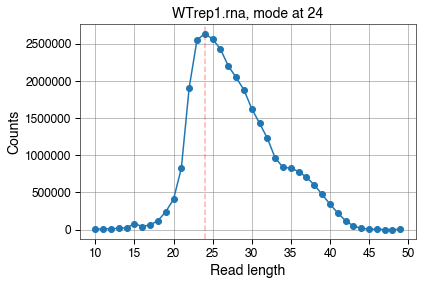

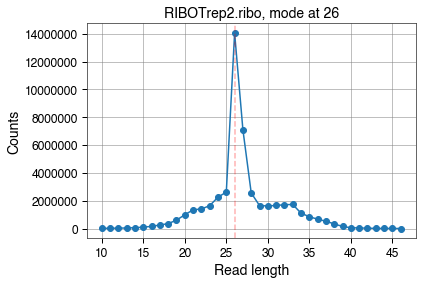

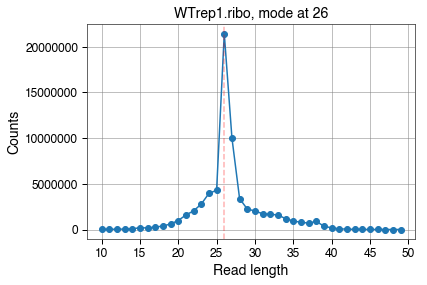

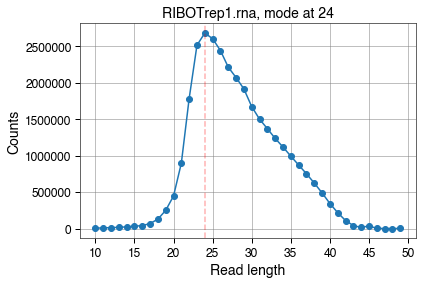

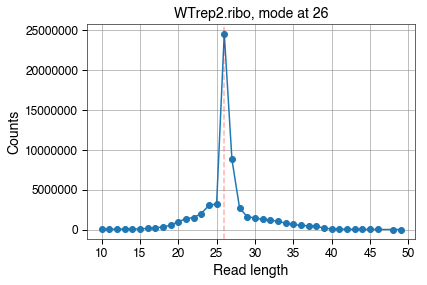

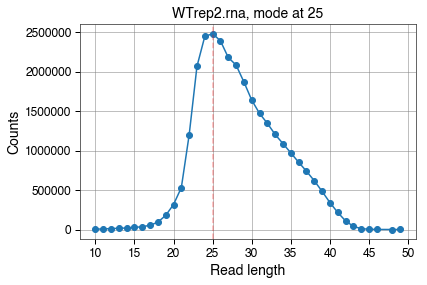

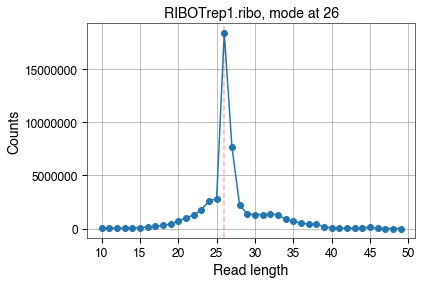

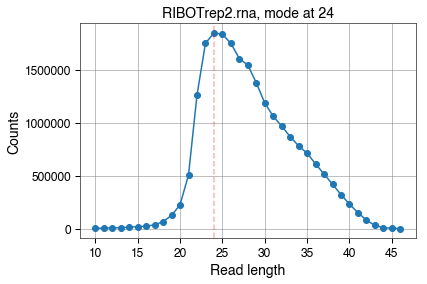

In [11]:
cumulative_df = pd.DataFrame()
for infile_loc in glob.glob('../Data/Read_length_info/*.final.readlengths.txt')[:]:
    sample_id = '.'.join(infile_loc.split('/')[-1].split('.')[:2])
    df = pd.read_csv(infile_loc, sep=' ', header=None, index_col=0)
    df.sort_index(inplace=True)
    
    a = df.index
    b = df[1]
    
    zipped = zip(a,b)
    max_index, max_val = max(zipped, key=lambda x: x[1])
    fig, ax = plt.subplots()
    ax.plot(a, b, marker='o')
    ax.set_title('{}, mode at {}'.format(sample_id, max_index))
    ax.axvline(max_index, c='r', linestyle='--', alpha=0.3)
    ax.set_ylabel('Counts')
    ax.set_xlabel('Read length')
    ax.get_yaxis().get_major_formatter().set_scientific(False)
    plt.tight_layout()
    plt.savefig('{}/{}.input.readlengths.pdf'.format(results_dir, sample_id), bbox_inches='tight')
    
    for index in df.index:
        cumulative_df.set_value(index, sample_id, df.loc[index][1])

In [12]:
cumulative_df.sort_index(inplace=True)
cumulative_df.to_csv('{}/alignment_input_read_lengths.tsv'.format(results_dir), sep='\t')